## Decision Trees
- Simple Tree like structure, model makes a decision at every node
- Useful in simple tasks
- One of the most popular algorithm
- Easy explainability, easy to show how a decision process works!
## Why decision trees are popular?
- Easy to interpret and present
- Well defined Logic, mimic human level thought
- Random Forests, Ensembles of decision trees are more powerful classifiers
- Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
- Build Decision Trees
## Two common algorithms -

- CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
- ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics

# TITANIC CHALLENGE
- BUILDING BINARY DECISION TREE FROM SCRATCH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#dropping unuseful columns

In [6]:
columns_to_drop=["PassengerId","Name","Embarked","Ticket","Cabin"]

In [7]:
data_clean=data.drop(columns_to_drop,axis=1)

In [8]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_clean["Sex"]=le.fit_transform(data_clean["Sex"])

In [10]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [12]:
# age has 714 values 
data_clean=data_clean.fillna(data_clean["Age"].mean())

In [13]:
data_clean.loc[2]# not like numpy ### loc for viewing second row

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [14]:
input_cols=["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols=["Survived"]

In [15]:
X=data_clean[input_cols]
Y=data_clean[output_cols]

In [16]:
print(X.shape,Y.shape)

(891, 6) (891, 1)


# Implementing decision tress

In [17]:
# define entropy and info gain

In [18]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    entropy=0.0
    # counts[1]has the counts for unique elements
    for ix in counts[1]:
        P=ix/N
        entropy+=(-1.0*P*np.log2(P))

    return entropy


In [19]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].iloc[ix]  # Use iloc to access value at index position
        if val > fval:
            x_right = pd.concat([x_right, x_data.iloc[[ix]]], ignore_index=True)
        else:
            x_left = pd.concat([x_left, x_data.iloc[[ix]]], ignore_index=True)
    
    return x_left, x_right


In [20]:
# x_left,x_right=divide_data(data_clean[:10],"Sex",.5)
# print(x_left)
# print(x_right)

In [21]:

# fkey is the column name or feature name fval is threshold val as income >7 lakh or<7lakh  mean
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain no further split
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [22]:
for fx in data_clean.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Survived
0.9607079018756469
Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [23]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.depth=depth
        self.max_depth=max_depth
        self.target=None
    def train(self,X_train):
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        # split data
        data_left,data_right=divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        #Truly a leaf node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if X_train.Survived.mean() >= 0.5:
                self.target="Survive"
            else :
                self.target="Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth >= self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
        
    def predict(self,test):
        if test[self.fkey] > self.fval:
                #go to right
            if self.right is None:
                    return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                    return self.target
            return self.left.predict(test)
        

In [24]:
split=int(.7*(data_clean.shape[0]))
train_data=data_clean[:split]
test_data=data_clean[split:]
test_data=test_data.reset_index(drop=True)

In [25]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [26]:
d=DecisionTree()
d.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [27]:
ypred=[]
for ix in range(test_data.shape[0]):
    ypred.append(d.predict(test_data.loc[ix]))# for ith row

In [28]:
y_actual=test_data[output_cols]

In [29]:
le = LabelEncoder()
ypred = le.fit_transform(ypred)

In [30]:
ypred=np.array(ypred).reshape((-1,1))
ypred.shape

(268, 1)

In [31]:
acc = np.sum(np.array(ypred)==np.array(y_actual))/ypred.shape[0]

In [32]:
acc*100

81.71641791044776

# Decision Tree using SKLEARN

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)# can set criterion as entropy as well

In [35]:
dt.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(max_depth=5)

In [36]:
dt.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0])

In [37]:
dt.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

In [38]:
# Visualising a decision tree

In [39]:
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [40]:
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

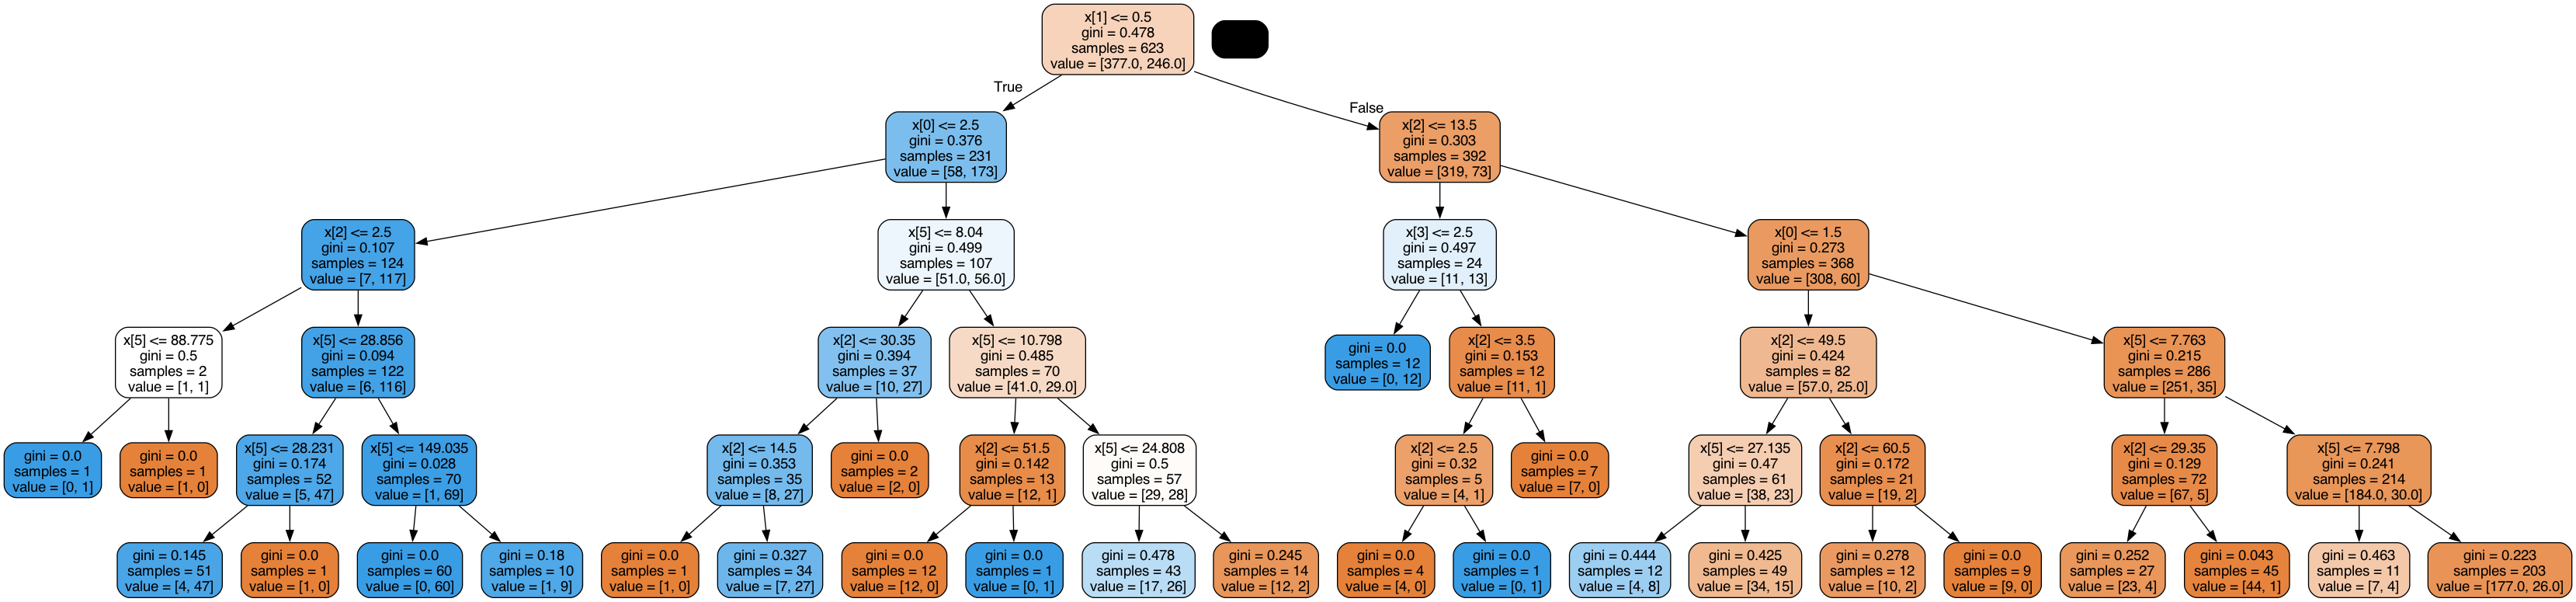

In [41]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forests

In [46]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)# n_estimators is number of trees

In [47]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [48]:
rf.score(X_train,Y_train)

0.8314606741573034

In [49]:
rf.score(X_test,Y_test)

0.8246268656716418

In [61]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=100,max_depth=8,criterion='entropy'),X_train,Y_train,cv=8).mean()

In [62]:
print(acc)

0.8297952047952049
